<a href="https://colab.research.google.com/github/Sivasurya-J/DataScienceAcademicProjects/blob/main/Iris_Clustering_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

****Exploration of the Dataset****

In [8]:
import pandas as pd
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
pd.set_option('display.precision', 2)

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [14]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

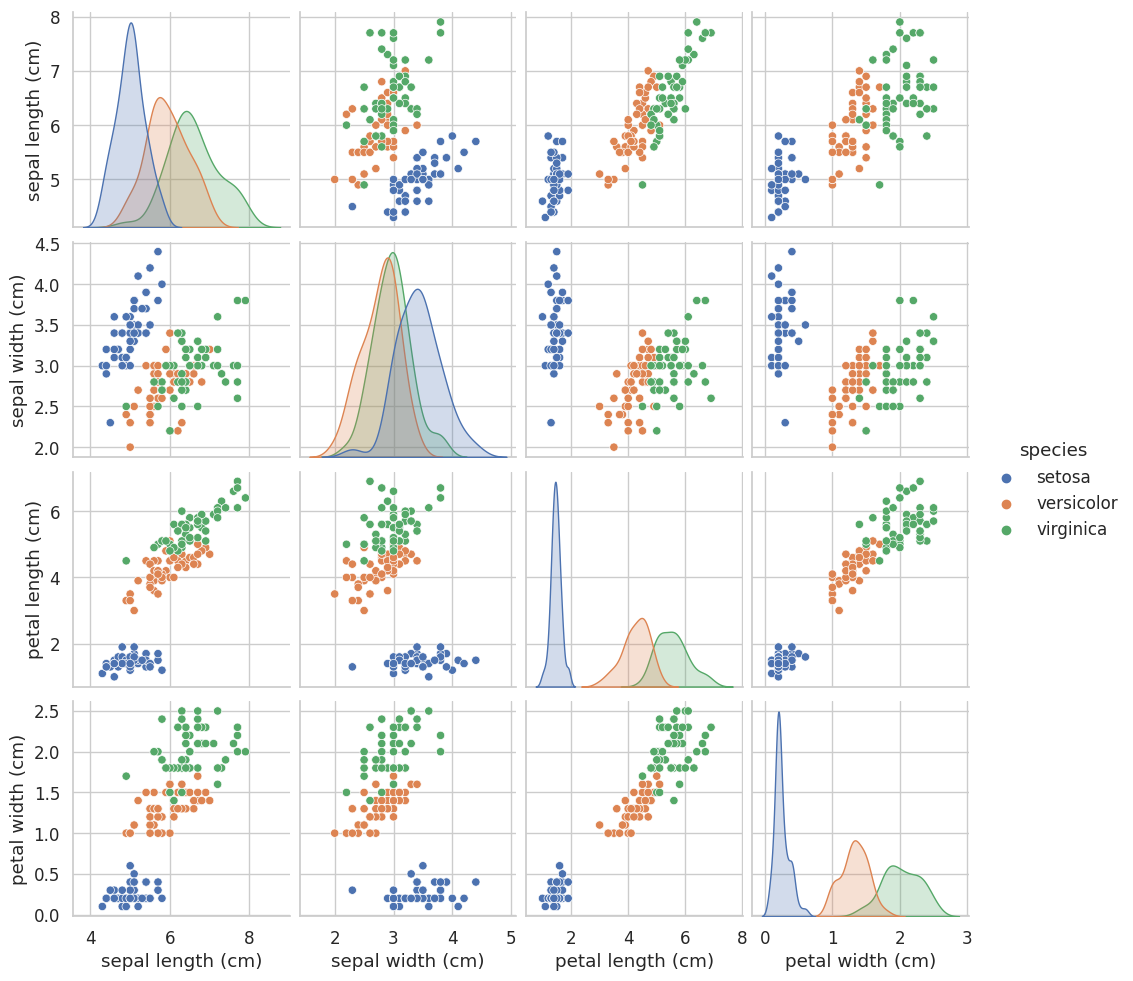

In [15]:
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars = iris_df.columns[0:4], hue='species')

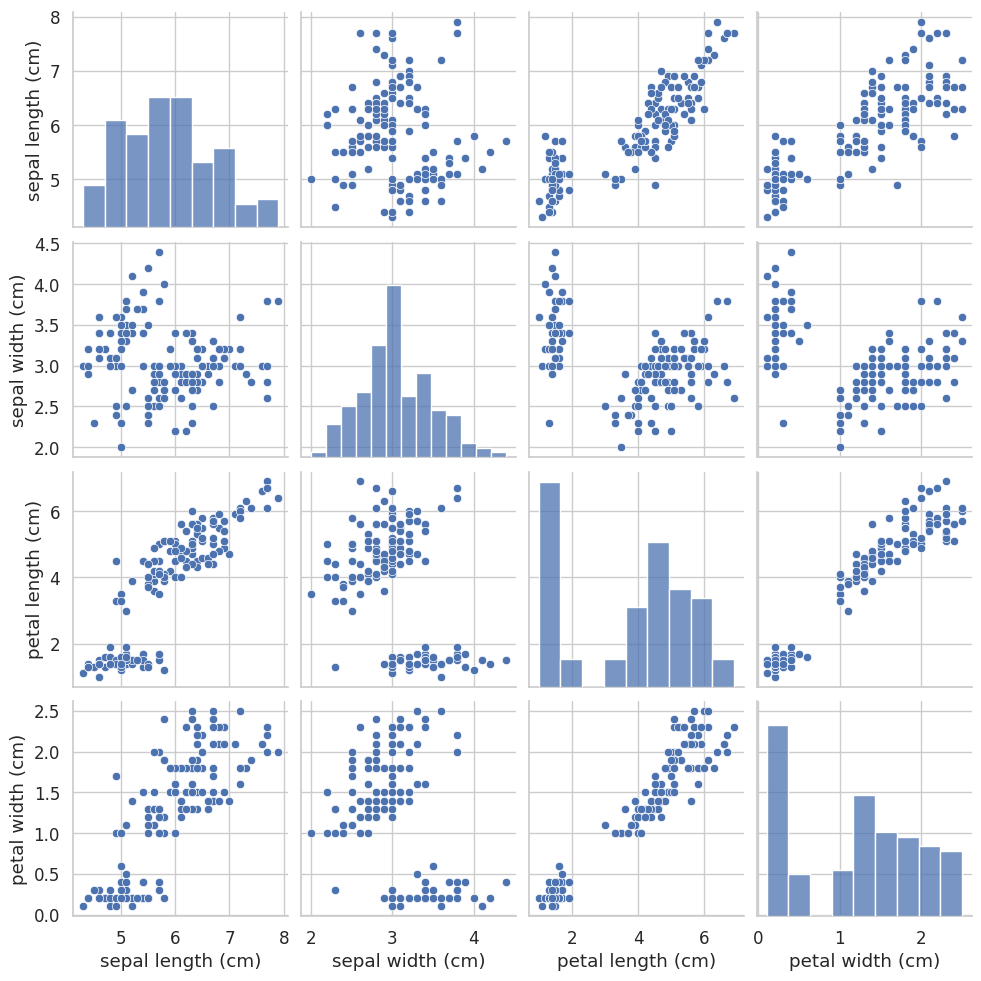

In [16]:
grid = sns.pairplot(data=iris_df, vars = iris_df.columns[0:4])

****Using K-Means Estimator & Model Fitting****

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)

In [18]:
kmeans.fit(iris.data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

In [19]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


****Dimensionality Reduction****

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=11)

In [23]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [24]:
iris_pca=pca.transform(iris.data)

In [25]:
iris_pca.shape

(150, 2)

In [26]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['Component1', 'Component2'])

In [27]:
iris_pca_df['species'] = iris_df.species

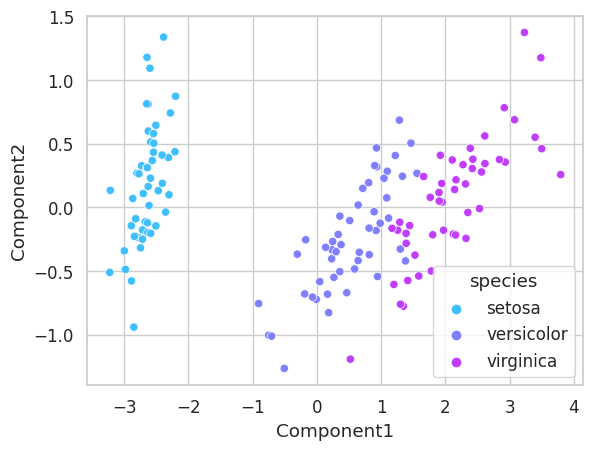

In [28]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', y='Component2', hue='species', legend='brief', palette='cool')

In [29]:
iris_centers = pca.transform(kmeans.cluster_centers_)

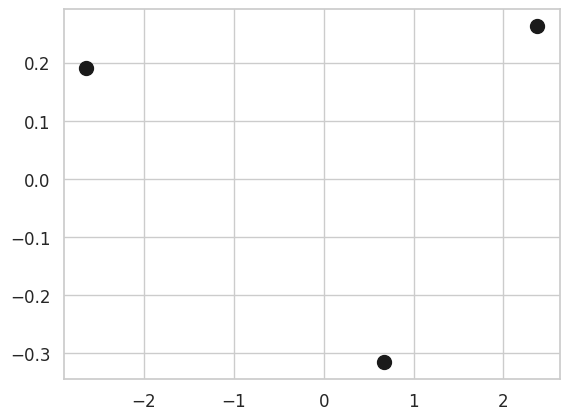

In [30]:
import matplotlib.pyplot as plt
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

***Choosing Best Clustering Estimator***

In [31]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

estimators = {
    'Kmeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}

In [32]:
import numpy as np

for name, estimator in estimators.items():
  estimator.fit(iris.data)
  print(f'\n{name}:')
  for i in range(0, 101, 50):
    labels, counts = np.unique(
        estimator.labels_[i:i+50], return_counts=True
    )
    print(f'{i}-{i+50}:')
    for label, count in zip(labels, counts):
      print(f'  label={label}, count={count}')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Kmeans:
0-50:
  label=1, count=50
50-100:
  label=0, count=48
  label=2, count=2
100-150:
  label=0, count=14
  label=2, count=36

DBSCAN:
0-50:
  label=-1, count=1
  label=0, count=49
50-100:
  label=-1, count=6
  label=1, count=44
100-150:
  label=-1, count=10
  label=1, count=40

MeanShift:
0-50:
  label=1, count=50
50-100:
  label=0, count=49
  label=1, count=1
100-150:
  label=0, count=50

SpectralClustering:
0-50:
  label=0, count=50
50-100:
  label=1, count=50
100-150:
  label=1, count=15
  label=2, count=35

AgglomerativeClustering:
0-50:
  label=1, count=50
50-100:
  label=0, count=49
  label=2, count=1
100-150:
  label=0, count=15
  label=2, count=35
